In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh

**Chapter 1**

<h2>Graphical Exploratory Data Analysis

<h3> Introduction to EDA

<h3> Plotting a Histogram

In [2]:
df = pd.read_csv('https://assets.datacamp.com/production/repositories/469/datasets/8fb59b9a99957c3b9b1c82b623aea54d8ccbcd9f/2008_all_states.csv')

In [3]:
df.head()

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west
3,AK,"State House District 13, Greater Palmer",11526,2800,8432,294,24.93,west
4,AK,"State House District 14, Greater Wasilla",10456,2132,8108,216,20.82,west


(array([ 25., 210., 518., 718., 734., 532., 267.,  97.,  39.,  13.]),
 array([ 5.03, 13.87, 22.71, 31.55, 40.39, 49.23, 58.07, 66.91, 75.75,
        84.59, 93.43]),
 <a list of 10 Patch objects>)

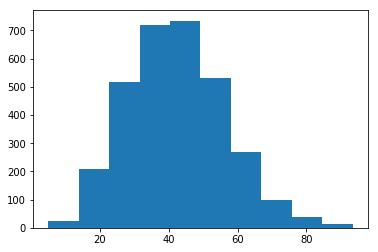

In [4]:
plt.hist(df['dem_share'])

In [5]:
bin_edges = [0,10,20,30,40,50,60,70,80,90,100]

(array([  5., 138., 496., 784., 846., 547., 231.,  81.,  24.,   1.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
 <a list of 10 Patch objects>)

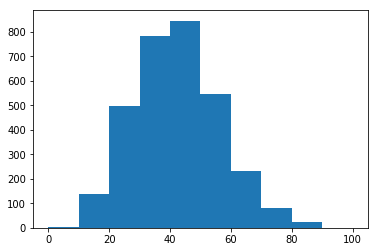

In [6]:
plt.hist(df['dem_share'] , bins = bin_edges)

**Setting seaborn styling**

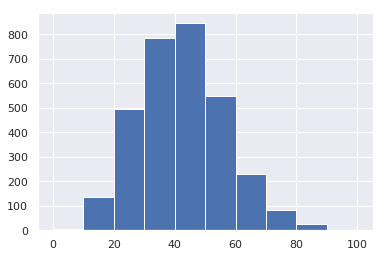

In [7]:
sns.set()
plt.hist(df['dem_share'] , bins = bin_edges)
plt.show()

<h3>Plotting all your data

<h3> Bee Swarm Plots

In histogram we are sweeping data to bins hence it loses the actual value , so we go for bee swarm plots

In [8]:
df_swing = pd.read_csv('https://assets.datacamp.com/production/repositories/469/datasets/e079fddb581197780e1a7b7af2aeeff7242535f0/2008_swing_states.csv')

In [9]:
df_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


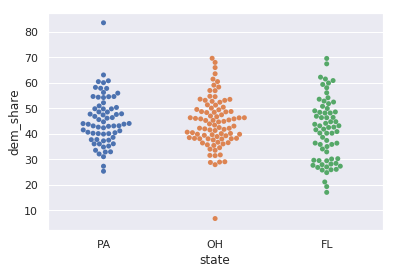

In [10]:
sns.swarmplot(x = 'state' , y = 'dem_share' , data = df_swing)

<h2>ECDF (Emperical Cummulative Distribution Function)

In [11]:
x = np.sort(df_swing['dem_share'])

In [12]:
y = np.arange(1 , len(x) + 1) / len(x)

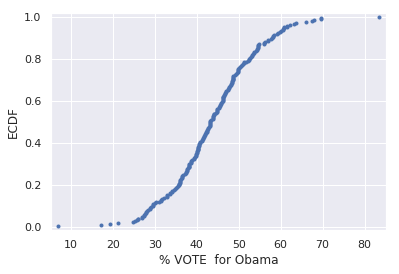

In [13]:
plt.plot(x , y , marker = '.' , linestyle = 'none')
plt.xlabel('% VOTE  for Obama')
plt.ylabel('ECDF')
plt.margins(0.02)#Keeps data off the plot edges
plt.show()

20% of counties in swing states had a 36% or less of ppl voting for Obama

70% of counties in swing states had 50% or less of it's people votr for obama

**Chapter 2**

<h2> Introduction to Summary Statistics

Sometimes we wanna summarize the whole data in one or two digits

**Mean**

In [14]:
np.mean(df_swing['dem_share'])

43.76441441441444

Mean is the sum of all data divided by the number n of data points

**Median**

In [15]:
np.median(df_swing['dem_share'])

43.185

Median is Immune to extreme data (outliers)

**Percentile**

In [16]:
np.percentile(df_swing['dem_share'] , [25 , 50 , 75])

array([37.3025, 43.185 , 49.925 ])

A median is the special name for the 50th Percentile

25th Percentile is greater than the **25% of the sorted data** and so on for the other percentiles

IQR -> Inter Quartile Range

Whisker in Box plot extend 1.5 times of IQR , Points out of Whisker are called outliers

Common **Criteria for outliers is 2IQR away from the median**

When No.of data points are large and Bee swarm plots are too clutered , use box plots

**Variance**

Captures the Spread / variability of data

AVg of the squared distance from the mean

In [17]:
np.var(df_swing['dem_share'])

114.24649492735986

In [18]:
np.std(df['dem_share'])

14.044750419631411

In [19]:
np.sqrt(np.var(df['dem_share']))

14.044750419631411

In [20]:
np.std(df['dem_share']) == np.sqrt(np.var(df['dem_share']))

True

<h3> Covarience and The Pearson correlation coefficient

In [21]:
df_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


Text(0, 0.5, '% Vote for Obama')

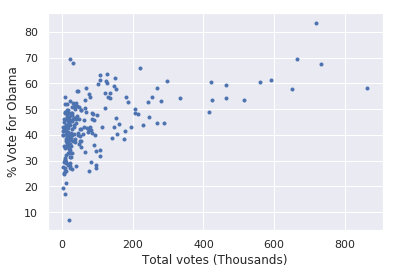

In [22]:
plt.plot(df_swing['total_votes'] / 1000 , df_swing['dem_share'] , marker = '.' , linestyle = 'none')
plt.xlabel('Total votes (Thousands)')
plt.ylabel('% Vote for Obama')

12 most populous counties all voted for Obama

**Covariance**

A measure of  how **two quantities vary together**

It's the mean of the product of these differences

p(row)(Pearson correlation covariance) = covariance / (std of x) * (std of y)

Value changes from -1 (Completely anti correlated) to +1 (completely correlated)

0 means there's no correlation

**Chapter 3**

<h3>Thinking Probabilistically : Discrete Variables

we get 50 data and find mean , there's no way to ensure 100% that we will get same mean if we gather 50 data again from scratch. <p> We can only know the new mean(for example) or any value that matters by <b>Probability</b>

**Simulating 4 coin flips**

In [23]:
np.random.seed(42)

In [24]:
random_numbers = np.random.random(size = 4)

In [25]:
random_numbers

array([0.37454012, 0.95071431, 0.73199394, 0.59865848])

In [26]:
heads = random_numbers < 0.5

In [27]:
heads

array([ True, False, False, False])

In [28]:
total_no_of_heads = np.sum(heads)

In [29]:
total_no_of_heads

1

In [30]:
n_all_heads = 0

In [31]:
#Initiate No of 4 heads trials

In [32]:
for _ in range(10000):
    heads = np.random.random(size = 4) < 0.5
    n_heads = np.sum(heads)
    if n_heads == 4 :
        n_all_heads += 1

In [33]:
n_all_heads / 10000 #No of all heads / total no of trials

0.0619

**Discrete Uniform Distribution**

The outcome of rolling a single fair dice is Discrete uniformly distributed

**Binomial Distribution**

The number of r of success in N Bernouli trials with probability P of success , is binomially distributed
<p> the number r of heads in 4 coin flips with probability 0.5 of heads in binomially distributed

**Sampling from the binomial Distribution**

In [34]:
np.random.binomial(4 , 0.5)
# no of trials (coin flips) , success rate

1

In [35]:
np.random.binomial(4 , 0.5 , size = 10)

array([1, 1, 2, 2, 1, 3, 2, 3, 3, 1])

**The Binomial PMF**

In [36]:
samples = np.random.binomial(60 , 0.1 , size = 10000)

In [37]:
samples

array([5, 5, 5, ..., 7, 7, 3])

In [38]:
samples.shape

(10000,)

**The Binomial CDF**

In [39]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1 , n + 1) / n

    return x, y


In [40]:
sns.set()

In [41]:
x , y = ecdf(samples)

In [42]:
x

array([ 0,  0,  0, ..., 16, 17, 17])

In [43]:
x.shape

(10000,)

In [44]:
y

array([1.000e-04, 2.000e-04, 3.000e-04, ..., 9.998e-01, 9.999e-01,
       1.000e+00])

In [45]:
y.shape

(10000,)

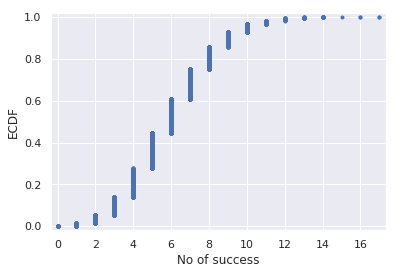

In [46]:
plt.plot(x , y , marker = '.' , linestyle = 'none')
plt.margins(0.02)
plt.xlabel('No of success')
plt.ylabel('ECDF')
plt.show()

**The poisson CDF**

In [47]:
samples = np.random.poisson(6 , size = 10000)
x , y = ecdf(samples)

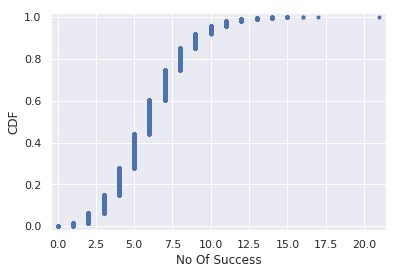

In [48]:
plt.plot(x , y , marker = '.' , linestyle = 'none')
plt.margins(0.02)
plt.xlabel('No Of Success')
plt.ylabel('CDF')
plt.show()

The results look like Binomial CDF

**Chapter 4**

<h3> Thinking Probalistically : Continous variables

In [49]:
df_light = pd.read_csv('https://assets.datacamp.com/production/repositories/469/datasets/df23780d215774ff90be0ea93e53f4fb5ebbade8/michelson_speed_of_light.csv')

In [50]:
df_light.head()

,Unnamed: 0,date,distinctness of image,temperature (F),position of deflected image,position of slit,displacement of image in divisions,difference between greatest and least,B,Cor,revolutions per second,radius (ft),value of one turn of screw,velocity of light in air (km/s),remarks
0,0,June 5,3,76,114.85,0.300,114.55,0.17,1.423,-0.132,257.36,28.672,0.99614,299850,Electric light.
1,1,June 7,2,72,114.64,0.074,114.56,0.10,1.533,-0.084,257.52,28.655,0.99614,299740,P.M. Frame inclined at various angles
2,2,June 7,2,72,114.58,0.074,114.50,0.08,1.533,-0.084,257.52,28.647,0.99614,299900,P.M. Frame inclined at various angles
3,3,June 7,2,72,85.91,0.074,85.84,0.12,1.533,-0.084,193.14,28.647,0.99598,300070,P.M. Frame inclined at various angles
4,4,June 7,2,72,85.97,0.074,85.89,O.07,1.533,-0.084,193.14,28.650,0.99598,299930,P.M. Frame inclined at various angles


**Checking Normality of the data**

In [51]:
mean = np.mean(df_light['velocity of light in air (km/s)'])

In [52]:
std = np.std(df_light['velocity of light in air (km/s)'])

In [53]:
samples = np.random.normal(mean , std , size = 10000)

In [54]:
x , y = ecdf(df_light['velocity of light in air (km/s)'])

In [55]:
x_theor , y_theor = ecdf(samples)

In [56]:
sns.set()

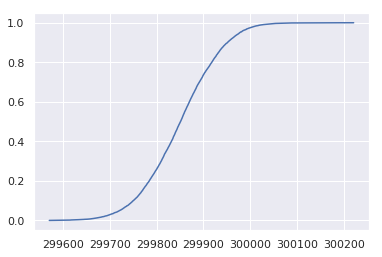

In [57]:
plt.plot(x_theor , y_theor)

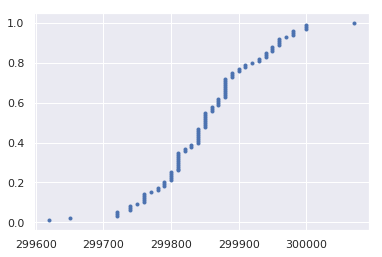

In [58]:
plt.plot(x , y , marker = '.' , linestyle = 'none')

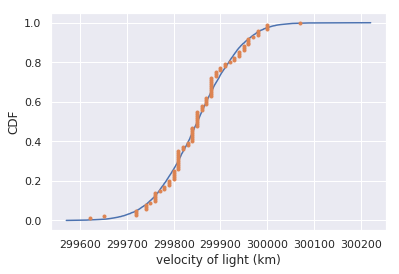

In [59]:
plt.plot(x_theor , y_theor)
plt.plot(x , y , marker = '.' , linestyle = 'none')

plt.xlabel('velocity of light (km)')
plt.ylabel('CDF')
plt.show()